## Task 1.3 Plot Linear Regression; DTM altitude VS station altitude. 

In [330]:
import numpy as np #handling arrays and matrixes
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data into dataframe
from sklearn.linear_model import # Linear Regression plotting

In [331]:
df_6 = pd.read_csv('df_6.csv', sep=";")  #load data set with correct delimiter


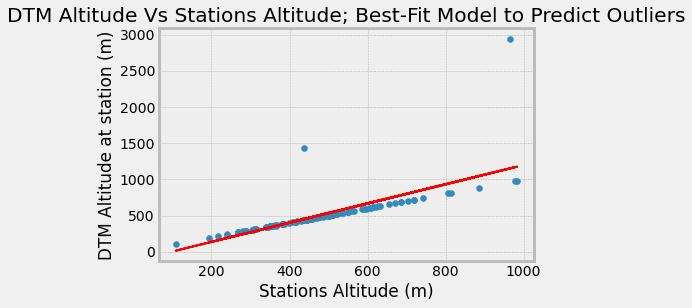

1.3 meters/meters: change in altitudinal meters of DTM vs change in meters of station altitude.


In [398]:

X = df_6.iloc[:, 6].values.reshape(-1, 1)  # values converts it into a numpy array | 6=index column values for Stations' Altitudes!
Y = df_6.iloc[:, 5].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column | 5 correlates to DTM altitudes' column!

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y) 


m = round((linear_regressor.coef_[0][0]),1) #derive gradient of linear regression



Y_pred = linear_regressor.predict(X)  # make predictions based on X values; Stations' Altitudes.

plt.scatter(X, Y) 

plt.title("DTM Altitude Vs Stations Altitude; Best-Fit Model to Predict Outliers")
plt.xlabel("Stations Altitude (m)")
plt.ylabel("DTM Altitude at station (m)")
plt.plot(X, Y_pred, color= 'red')
#plt.savefig('Linear Regression DTM Altitude vs Station Altitude')
plt.show()
print (m, "meters/meters: change in altitudinal meters of DTM vs change in meters of station altitude.")

#### The greatest differences seem to occur at higher altitudinal values of the DTM and station file! Namely; Zugspitze and Großer Arber!!
#### DWD station altidudes are incorrect, calibration error, false presets, values are also round to nearest whole number. 

## Task 1.4 Plot Linear Regression; DTM altitude VS years.
#### First Remove NaN values from df_6

In [333]:
df_2 = pd.read_csv("df_6.csv", sep=";") # reading csv into dataframe, new datafram will be called df_2

med_2017 = df_2["2017_avg_T(°C)"].median(skipna=True)  # removing NaN Values so the matrix has uniform shape.
med_2018 = df_2["2018_avg_T(°C)"].median(skipna=True)  # The new values are the mean value of the entire year column.
med_2019 = df_2["2019_avg_T(°C)"].median(skipna=True)


df_2["2017_avg_T(°C)"].fillna(med_2017, inplace=True)  # filling the generated mean values into the dataset
df_2["2018_avg_T(°C)"].fillna(med_2018, inplace=True)
df_2["2019_avg_T(°C)"].fillna(med_2019, inplace=True)
 

In [396]:
df_2 [df_2.DTM50_Altitude >=1000]   #No more NaN values!


,stations_id,name,2017_avg_T(°C),2018_avg_T(°C),2019_avg_T(°C),DTM50_Altitude,altitude,latitude,longitude
23,1832,Großer Arber,9.07,5.05,4.94,1433.200073,436,49.1129,13.1338
80,5792,Zugspitze,-3.86,-3.00,-3.20,2943.400146,965,47.4210,10.9848


## Plotting Linear Regression: DTM Altitude Vs Yearly Mean Temperature Bayern 2017-2019

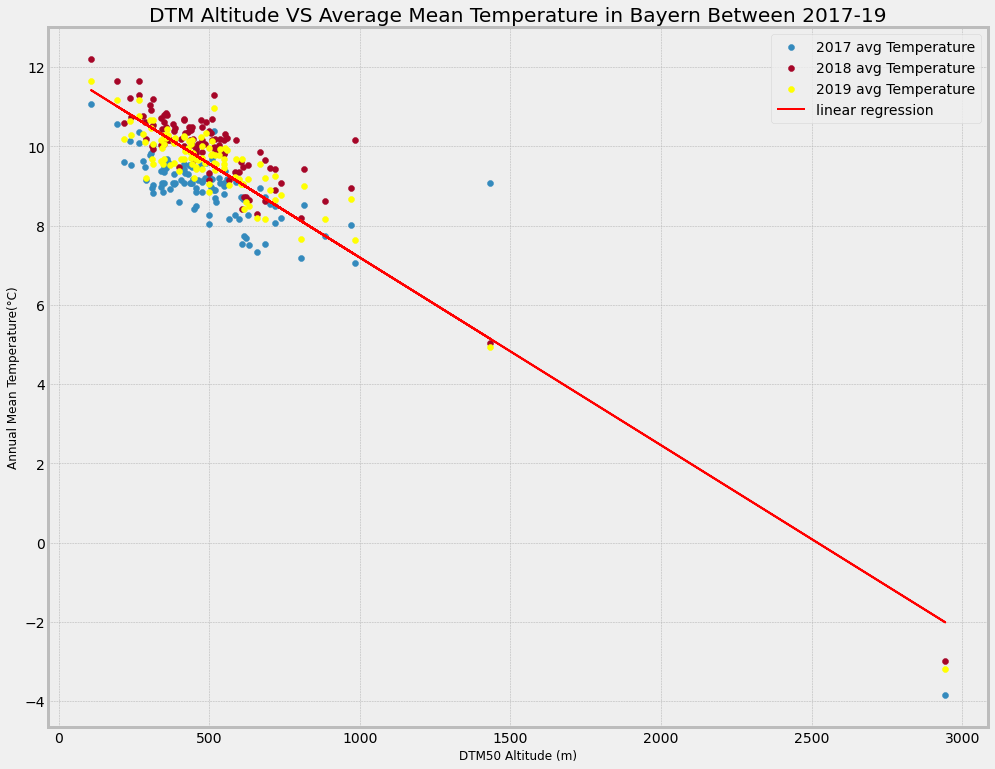

Gradient = -0.004°C/m


<Figure size 432x288 with 0 Axes>

In [430]:

x = df_2["DTM50_Altitude"].values.reshape(-1, 1)  # values converted it into a numpy array
y1 = df_2["2017_avg_T(°C)"].values.reshape(-1, 1)  
y2 = df_2["2018_avg_T(°C)"].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
y3 = df_2["2019_avg_T(°C)"].values.reshape(-1, 1)  

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(x, y1)  
linear_regressor.fit(x, y2)  # perform linear regression
linear_regressor.fit(x, y3)  

m_combined = round((regr1.coef_[0][0]),3) #derive gradient to 3 significant figures 

Y_pred = linear_regressor.predict(x)  # make predictions

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(12)

plt.scatter(x, y1, label='2017 avg Temperature') 
plt.scatter(x, y2, label='2018 avg Temperature')  # scatter plots of relevant years
plt.scatter(x, y3, color= 'yellow', label='2019 avg Temperature')


plt.plot(x, Y_pred, color='red', label='linear regression')  #plot of regression
plt.xlabel("DTM50 Altitude (m)", fontsize = 12)
plt.ylabel("Annual Mean Temperature(°C)", fontsize=12)
plt.legend(loc="best")
plt.title("DTM Altitude VS Average Mean Temperature in Bayern Between 2017-19")
plt.show()
plt.savefig('Linear Regression DTM Altitude vs Mean Annual Temperature in Bayern Between 2017-2019')

print (f"Gradient = {str(m_combined)}°C/m")
